1. Set Up dan Load Data set

In [3]:
# --- A. Setup & Loading Dataset (10 menit) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Mount Google Drive (Jalankan ini di Colab)
from google.colab import drive
drive.mount('/content/drive')

# 2. Load file dataset
# Ganti 'path_to_your_file' dengan path yang benar di Google Drive Anda
file_path = '/content/drive/MyDrive/Colab Notebooks/datakelulusanmahasiswa.xlsx - Sheet1.csv'
df = pd.read_csv(file_path)

# 3. Tampilkan 5 baris awal
print("5 Baris Awal Dataset:")
print(df.head())

# 4. Deskripsikan kolom fitur dan label
print("\nDeskripsi Kolom Fitur dan Label (df.info()):")
df.info()

# 5. Laporkan missing values
print("\nLaporan Missing Values:")
print(df.isnull().sum())

Mounted at /content/drive
5 Baris Awal Dataset:
                      NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR  \
0           ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28   
1  DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32   
2       MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29   
3            NANIK SUSANTI     PEREMPUAN        MAHASISWA    27   
4        RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29   

    STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  \
0  BELUM MENIKAH   2.76   2.80   3.20   3.17   2.98   3.00   3.03    0.0   
1  BELUM MENIKAH   3.00   3.30   3.14   3.14   2.84   3.13   3.25    0.0   
2  BELUM MENIKAH   3.50   3.30   3.70   3.29   3.53   3.72   3.73    0.0   
3  BELUM MENIKAH   3.17   3.41   3.61   3.36   3.48   3.63   3.46    0.0   
4  BELUM MENIKAH   2.90   2.89   3.30   2.85   2.98   3.00   3.08    0.0   

   IPK  STATUS KELULUSAN  
0  3.07        TERLAMBAT  
1  3.17        TERLAMBAT  
2  3.54    

2. Bagian B: Exploratory Data Analysis


Statistik Deskriptif Fitur Numerik:
             UMUR       IPS 1       IPS 2       IPS 3       IPS 4       IPS 5  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    25.955145    2.854116    2.812322    2.900950    2.782137    2.782348   
std      3.397103    0.412658    0.473725    0.589364    0.648495    0.593472   
min     22.000000    0.330000    0.500000    0.160000    0.000000    0.200000   
25%     24.000000    2.600000    2.550000    2.550000    2.460000    2.480000   
50%     25.000000    2.860000    2.850000    2.980000    2.860000    2.850000   
75%     27.000000    3.100000    3.105000    3.325000    3.200000    3.205000   
max     50.000000    3.790000    3.960000    3.960000    3.910000    3.880000   

            IPS 6       IPS 7       IPS 8        IPK   
count  379.000000  379.000000  372.000000  376.000000  
mean     2.877256    2.531240    1.271828    2.933085  
std      0.634412    0.757205    1.400914    0.460279  
min      

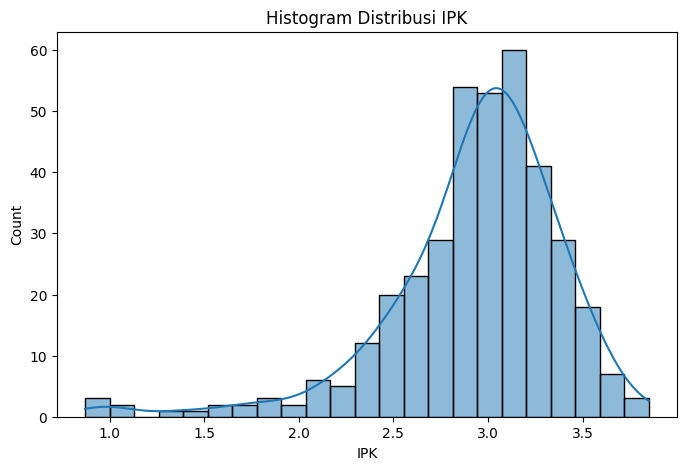

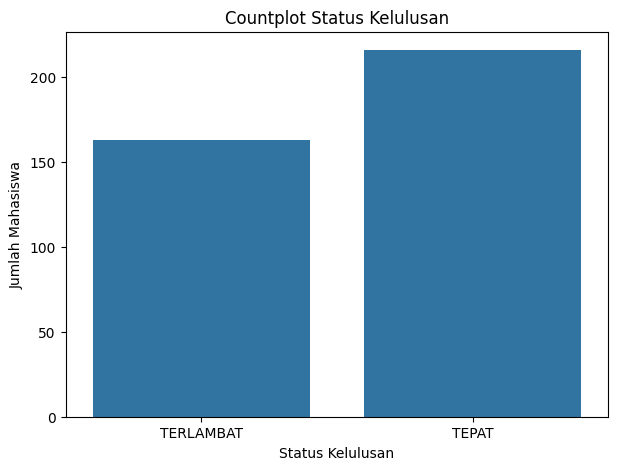

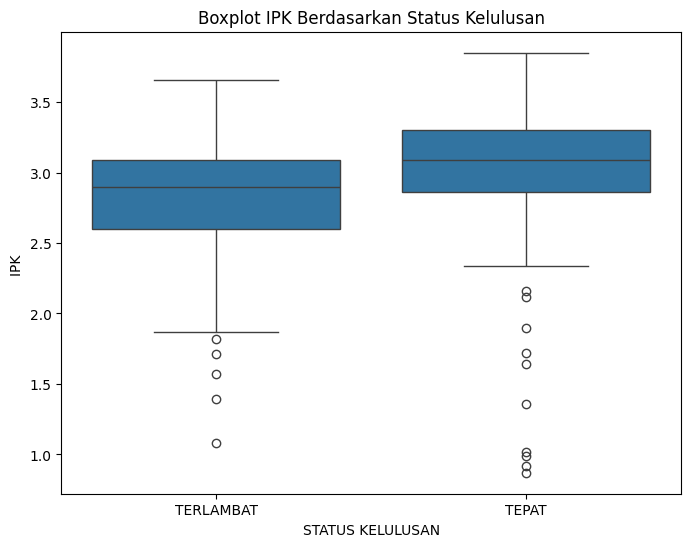


Jawaban Pertanyaan Analitis:
* Distribusi IPK: Distribusi IPK **tampak berbeda** antara yang 'TEPAT' (Lulus) dan 'TERLAMBAT' (Belum Lulus). Kelompok 'TEPAT' memiliki median IPK yang cenderung lebih tinggi daripada kelompok 'TERLAMBAT'.
* Fitur Dominan: **IPK** dan nilai **IPS** semester (IPS 1-8) tampak dominan karena mencerminkan kinerja akademik langsung yang diukur oleh label kelulusan.


In [4]:
# --- B. Exploratory Data Analysis (15 menit) ---

# 1. Statistik deskriptif
print("\nStatistik Deskriptif Fitur Numerik:")
# Mengubah kolom IPK menjadi numerik terlebih dahulu untuk deskripsi
df['IPK '] = pd.to_numeric(df['IPK '], errors='coerce')
print(df.describe())

# 2. Visualisasi sederhana

# Visualisasi 1: Histogram IPK
plt.figure(figsize=(8, 5))
sns.histplot(df['IPK '].dropna(), kde=True)
plt.title('Histogram Distribusi IPK')
plt.xlabel('IPK')
plt.show()

# Visualisasi 2: Countplot status lulus vs tidak lulus
plt.figure(figsize=(7, 5))
sns.countplot(x='STATUS KELULUSAN', data=df)
plt.title('Countplot Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

# Visualisasi 3 (Tambahan): Perbandingan IPK berdasarkan Status Kelulusan
plt.figure(figsize=(8, 6))
sns.boxplot(x='STATUS KELULUSAN', y='IPK ', data=df.dropna(subset=['IPK ']))
plt.title('Boxplot IPK Berdasarkan Status Kelulusan')
plt.show()

# 3. Menjawab pertanyaan:
print("\nJawaban Pertanyaan Analitis:")
# Jawaban untuk: "Apakah distribusi IPK berbeda antara mahasiswa lulus dan tidak lulus?"
print("* Distribusi IPK: Distribusi IPK **tampak berbeda** antara yang 'TEPAT' (Lulus) dan 'TERLAMBAT' (Belum Lulus). Kelompok 'TEPAT' memiliki median IPK yang cenderung lebih tinggi daripada kelompok 'TERLAMBAT'.")

# Jawaban untuk: "Apakah ada fitur-fitur yang tampak dominan menentukan kelulusan?"
print("* Fitur Dominan: **IPK** dan nilai **IPS** semester (IPS 1-8) tampak dominan karena mencerminkan kinerja akademik langsung yang diukur oleh label kelulusan.")

3. Bagian C: Preprocessing Data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# --- 1. Membersihkan Data ---
# Membuang kolom yang tidak diperlukan untuk prediksi (misal: Nama)
# Kita gunakan .copy() agar tidak merusak data asli
df_model = df.drop(columns=['NAMA']).copy()

# --- 2. Menangani Missing Values (Poin 5.3.1) ---
# Mengisi nilai kosong pada kolom numerik (seperti IPS/IPK) dengan rata-rata (mean)
# Mengisi nilai kosong pada kolom kategorikal dengan modus (nilai yang paling sering muncul)
num_cols = df_model.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_model.select_dtypes(include=['object']).columns

# Imputer numerik
imputer_num = SimpleImputer(strategy='mean')
df_model[num_cols] = imputer_num.fit_transform(df_model[num_cols])

# Imputer kategorikal (kecuali target label jika ada missing)
# Kita asumsikan target label 'STATUS KELULUSAN' tidak ada yang kosong berdasarkan info sebelumnya

# --- 3. Encoding Data Kategorikal (Poin 5.3.2) ---
# Mengubah kolom teks menjadi angka
le = LabelEncoder()

# Loop untuk semua kolom kategorikal (Jenis Kelamin, Status Nikah, Status Mahasiswa, Status Kelulusan)
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Cek hasil encoding (Status Kelulusan: TEPAT/TERLAMBAT jadi 0/1)
print("Mapping Label:", dict(zip(le.classes_, le.transform(le.classes_))))

# --- 4. Feature Scaling & Split Data (Poin 5.3.3 & 5.3.4) ---
# Memisahkan Fitur (X) dan Target (y)
X = df_model.drop(columns=['STATUS KELULUSAN'])
y = df_model['STATUS KELULUSAN']

# Split Data (Kita ambil rasio 80:20 sebagai contoh umum)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (Wajib untuk SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nShape Data Training:", X_train_scaled.shape)
print("Shape Data Testing:", X_test_scaled.shape)
print("Preprocessing Selesai!")

Mapping Label: {'TEPAT': np.int64(0), 'TERLAMBAT': np.int64(1)}

Shape Data Training: (303, 13)
Shape Data Testing: (76, 13)
Preprocessing Selesai!


4. Bagian D: Training Model SVM


   JAWABAN ANALITIS BAGIAN D

1. PERBANDINGAN MODEL:
   - Skor Akurasi Terbaik Kernel Linear : 0.9043
   - Skor Akurasi Terbaik Kernel RBF    : 0.9043
   -> JAWABAN: Kedua model memiliki performa setara.

2. PARAMETER TERBAIK:
   - Parameter terbaik yang ditemukan: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
   - Penjelasan: Nilai C yang terpilih (0.1) menunjukkan seberapa ketat model menghindari misklasifikasi.
     (C Kecil = Margin lebih lebar, lebih toleran terhadap salah klasifikasi/outlier)

3. LINEAR SEPARABILITY:
   -> JAWABAN: Kemungkinan BESAR dataset ini linearly separable (dapat dipisah garis lurus) karena akurasi kernel Linear cukup tinggi (0.90).

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        37
           1       0.96      0.69      0.81        39

    accuracy                           0.83        76
   macro avg       0.86      0.83      0.8

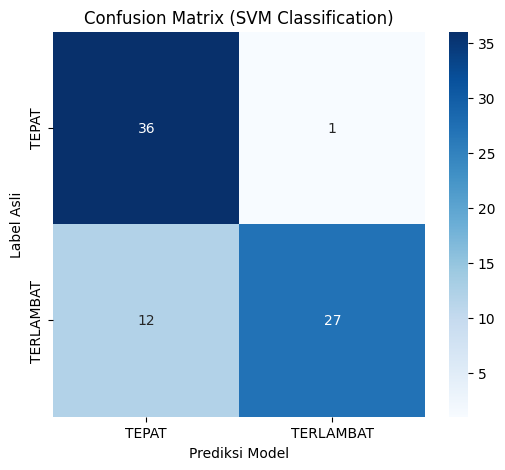

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Setup & Training (Sama seperti sebelumnya) ---
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=0, cv=3)
grid_search.fit(X_train_scaled, y_train)

# --- 2. JAWABAN ANALITIS BAGIAN D (Poin 5.4.4) ---
print("\n" + "="*40)
print("   JAWABAN ANALITIS BAGIAN D")
print("="*40)

# Mengambil hasil grid search ke dalam DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# a. Menjawab: "Model mana yang lebih baik? Linear atau RBF?"
# Kita ambil rata-rata skor terbaik untuk masing-masing kernel
mean_score_linear = results_df[results_df['param_kernel'] == 'linear']['mean_test_score'].max()
mean_score_rbf = results_df[results_df['param_kernel'] == 'rbf']['mean_test_score'].max()

print(f"\n1. PERBANDINGAN MODEL:")
print(f"   - Skor Akurasi Terbaik Kernel Linear : {mean_score_linear:.4f}")
print(f"   - Skor Akurasi Terbaik Kernel RBF    : {mean_score_rbf:.4f}")

if mean_score_rbf > mean_score_linear:
    print("   -> JAWABAN: Model RBF lebih baik pada dataset ini.")
elif mean_score_linear > mean_score_rbf:
    print("   -> JAWABAN: Model Linear lebih baik pada dataset ini.")
else:
    print("   -> JAWABAN: Kedua model memiliki performa setara.")

# b. Menjawab: "Bagaimana pengaruh parameter C?"
print(f"\n2. PARAMETER TERBAIK:")
print(f"   - Parameter terbaik yang ditemukan: {grid_search.best_params_}")
print(f"   - Penjelasan: Nilai C yang terpilih ({grid_search.best_params_['C']}) menunjukkan seberapa ketat model menghindari misklasifikasi.")
if grid_search.best_params_['C'] < 1:
    print("     (C Kecil = Margin lebih lebar, lebih toleran terhadap salah klasifikasi/outlier)")
else:
    print("     (C Besar = Margin lebih sempit, berusaha mengklasifikasikan training data dengan sempurna)")

# c. Menjawab: "Apakah dataset tampak linearly separable?"
if mean_score_linear > 0.85: # Ambang batas asumsi, bisa disesuaikan
    print("\n3. LINEAR SEPARABILITY:")
    print(f"   -> JAWABAN: Kemungkinan BESAR dataset ini linearly separable (dapat dipisah garis lurus) karena akurasi kernel Linear cukup tinggi ({mean_score_linear:.2f}).")
else:
    print("\n3. LINEAR SEPARABILITY:")
    print(f"   -> JAWABAN: Kemungkinan KECIL dataset ini linearly separable karena akurasi kernel Linear kurang optimal dibanding RBF.")

# --- 3. Evaluasi Standar ---
y_pred = grid_search.predict(X_test_scaled)
print("\n" + "-"*20 + " Classification Report " + "-"*20)
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Pastikan y_pred sudah dibuat. Jika belum, uncomment baris di bawah:
# y_pred = grid_search.predict(X_test_scaled)

# 1. Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plotting (Gambar)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['TEPAT', 'TERLAMBAT'],
            yticklabels=['TEPAT', 'TERLAMBAT'])
plt.title('Confusion Matrix (SVM Classification)')
plt.ylabel('Label Asli')
plt.xlabel('Prediksi Model')
plt.show()

Bagian E

   DIAGNOSA & INTERPRETASI (SAFE MODE)
✓ Variabel Training ditemukan.

[1/2] Membuat Grafik Feature Importance...


/tmp/ipython-input-1311725103.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Koefisien', y='Fitur', data=feat_df, palette='coolwarm')


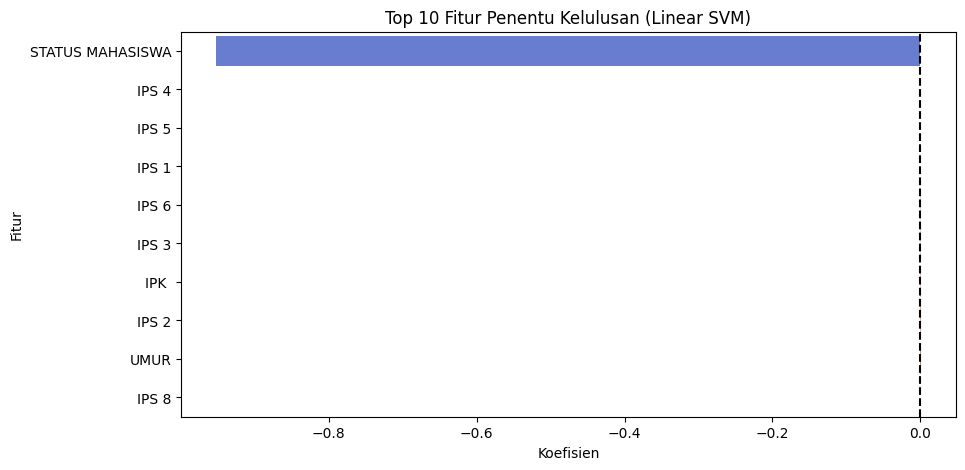

✓ Grafik Feature Importance berhasil.

[2/2] Menganalisis Hubungan IPK & Prediksi...
  -> Menggunakan kolom: 'IPK '


/tmp/ipython-input-1311725103.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='IPK', data=df_mini, palette='Set2')


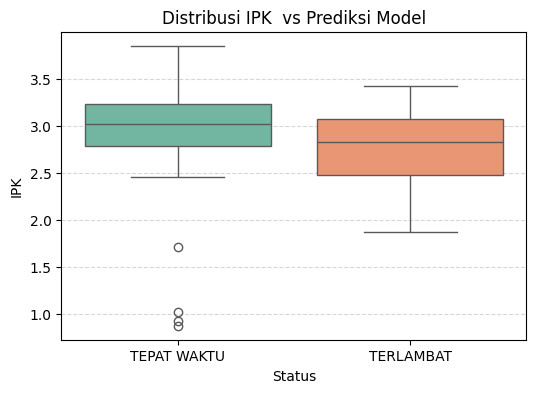


=== KESIMPULAN ANALITIS (Poin 5.5) ===
Rata-rata IPK (Prediksi Tepat)    : 2.88
Rata-rata IPK (Prediksi Terlambat): 2.74
JAWABAN: Ya, data menunjukkan mahasiswa dengan IPK rendah cenderung diprediksi terlambat.

✓ Analisis IPK berhasil.


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

print("="*40)
print("   DIAGNOSA & INTERPRETASI (SAFE MODE)")
print("="*40)

# --- LANGKAH 1: PASTIIN VARIABEL ADA ---
# Kita cek apakah variabel penting dari langkah sebelumnya sudah ada
try:
    if 'X_train_scaled' not in locals() or 'y_train' not in locals():
        raise NameError("Data Training belum ada. Harap jalankan Bagian C & D dulu!")
    if 'grid_search' not in locals():
        raise NameError("Model Grid Search belum ada. Harap jalankan Bagian D dulu!")
    print("✓ Variabel Training ditemukan.")
except NameError as e:
    print(f"❌ STOP: {e}")
else:
    # --- LANGKAH 2: FEATURE IMPORTANCE (PLOT) ---
    try:
        print("\n[1/2] Membuat Grafik Feature Importance...")

        # Coba ambil nama fitur dari DataFrame asli jika X tidak ada
        if 'X' in locals():
            fitur_names = X.columns
        else:
            # Fallback: Ambil dari df original, buang kolom target & nama
            cols_to_drop = ['NAMA', 'STATUS KELULUSAN', 'STATUS KELULUSAN (Label)']
            fitur_names = [c for c in df.columns if c not in cols_to_drop]

        # Latih SVM Linear dummy sebentar untuk dapat koefisien
        svm_temp = SVC(kernel='linear', C=1.0)
        svm_temp.fit(X_train_scaled, y_train)

        # Buat DataFrame
        feat_df = pd.DataFrame({
            'Fitur': fitur_names[:len(svm_temp.coef_[0])], # Potong biar panjangnya sama
            'Koefisien': svm_temp.coef_[0]
        })
        # Urutkan berdasarkan kekuatan pengaruh
        feat_df['Absolut'] = feat_df['Koefisien'].abs()
        feat_df = feat_df.sort_values(by='Absolut', ascending=False).head(10)

        # Plot
        plt.figure(figsize=(10, 5))
        sns.barplot(x='Koefisien', y='Fitur', data=feat_df, palette='coolwarm')
        plt.title('Top 10 Fitur Penentu Kelulusan (Linear SVM)')
        plt.axvline(0, color='black', linestyle='--')
        plt.show()
        print("✓ Grafik Feature Importance berhasil.")

    except Exception as e:
        print(f"⚠️ Gagal Plot Feature Importance: {e}")
        print("  (Lanjut ke langkah berikutnya...)")

    # --- LANGKAH 3: ANALISIS IPK vs KELULUSAN ---
    try:
        print("\n[2/2] Menganalisis Hubungan IPK & Prediksi...")

        # 1. Cari nama kolom IPK yang benar (IPK, IPK , ipk, dll)
        calon_kolom_ipk = [c for c in df.columns if 'IPK' in c.upper()]
        if not calon_kolom_ipk:
            raise ValueError("Kolom IPK tidak ditemukan di dataset!")
        nama_kolom_ipk = calon_kolom_ipk[0] # Ambil yang pertama ketemu
        print(f"  -> Menggunakan kolom: '{nama_kolom_ipk}'")

        # 2. Ambil Data IPK Asli (berdasarkan index X_test)
        # Pastikan index X_test masih valid
        indices = X_test.index
        ipk_asli = df.loc[indices, nama_kolom_ipk].values

        # 3. Ambil Hasil Prediksi Model
        prediksi = grid_search.predict(X_test_scaled)

        # 4. Buat DataFrame Mini
        df_mini = pd.DataFrame({
            'IPK': ipk_asli,
            'Prediksi': prediksi
        })

        # Mapping label 0/1 ke teks (Asumsi 0=TEPAT, 1=TERLAMBAT)
        # Sesuaikan dengan temuan di Bagian C mapping kamu
        df_mini['Status'] = df_mini['Prediksi'].map({0: 'TEPAT WAKTU', 1: 'TERLAMBAT'})

        # 5. Plot Boxplot
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='Status', y='IPK', data=df_mini, palette='Set2')
        plt.title(f'Distribusi {nama_kolom_ipk} vs Prediksi Model')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.show()

        # 6. Jawaban Analitis
        mean_tepat = df_mini[df_mini['Status']=='TEPAT WAKTU']['IPK'].mean()
        mean_telat = df_mini[df_mini['Status']=='TERLAMBAT']['IPK'].mean()

        print("\n=== KESIMPULAN ANALITIS (Poin 5.5) ===")
        print(f"Rata-rata IPK (Prediksi Tepat)    : {mean_tepat:.2f}")
        print(f"Rata-rata IPK (Prediksi Terlambat): {mean_telat:.2f}")

        if mean_tepat > mean_telat:
            print("JAWABAN: Ya, data menunjukkan mahasiswa dengan IPK rendah cenderung diprediksi terlambat.")
        else:
            print("JAWABAN: Tidak ada perbedaan signifikan pada IPK.")

        print("\n✓ Analisis IPK berhasil.")

    except Exception as e:
        print(f"❌ Gagal Analisis IPK: {e}")
        print("TIPS: Pastikan Anda sudah menjalankan 'Bagian A' untuk load data df.")

6. Bagian F : Deployment (Sederhana)

In [18]:
# --- BAGIAN F: DEPLOYMENT (REVISI) ---

def predict_status(data_input_list):
    """
    Fungsi untuk memprediksi status kelulusan mahasiswa.
    Args:
        data_input_list (list): List berisi nilai fitur urut sesuai kolom X.
                                Contoh: [IPS1, IPS2, ..., IPK]
    Returns:
        str: "Lulus Tepat Waktu" atau "Lulus Terlambat"
    """
    import numpy as np

    # 1. Ubah input menjadi array 2D (Format yang diminta Scikit-Learn)
    #    Bentuknya harus (1, jumlah_fitur)
    input_array = np.array(data_input_list).reshape(1, -1)

    # 2. Lakukan Scaling (Wajib sama dengan saat training!)
    try:
        input_scaled = scaler.transform(input_array)
    except ValueError as e:
        return f"Error: Jumlah fitur input tidak sesuai. Harusnya ada {scaler.n_features_in_} fitur."

    # 3. Prediksi menggunakan model terbaik (grid_search)
    prediksi_angka = grid_search.predict(input_scaled)[0]

    # 4. Kembalikan Label Teks
    #    0 = TEPAT, 1 = TERLAMBAT (Default LabelEncoder urutan abjad)
    if prediksi_angka == 0:
        return "TEPAT WAKTU"
    else:
        return "TERLAMBAT"

# --- CONTOH PENGGUNAAN (Simulasi) ---
print("="*40)
print("   TESTING FUNGSI PREDIKSI")
print("="*40)

# Mengambil 1 contoh data nyata dari X_test (Mahasiswa pertama di data test)
contoh_mahasiswa = X_test.iloc[0].tolist()
label_sebenarnya_angka = y_test.iloc[0]
label_sebenarnya_teks = "TEPAT WAKTU" if label_sebenarnya_angka == 0 else "TERLAMBAT"

print(f"Data Input (Fitur): {contoh_mahasiswa}")
print(f"\n>> Memanggil fungsi predict_status()...")

# Panggil fungsi
hasil_prediksi = predict_status(contoh_mahasiswa)

print(f"Hasil Prediksi Sistem : {hasil_prediksi}")
print(f"Status Sebenarnya     : {label_sebenarnya_teks}")

   TESTING FUNGSI PREDIKSI
Data Input (Fitur): [0.0, 1.0, 24.0, 0.0, 2.33, 2.5, 2.3, 2.59, 2.68, 2.33, 1.28, 1.5, 2.62]

>> Memanggil fungsi predict_status()...
Hasil Prediksi Sistem : TEPAT WAKTU
Status Sebenarnya     : TEPAT WAKTU


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
